# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW2_ID1_ID2.file"
<br>
Good Luck!
</p>

# Question 1 - Generalizrtion and Overfit (30 pt)

<p style="font-size: 17px"> In this exercise, we will demonstrate overfitting to random labels.The settings are the following:
<ul style="font-size: 17px">
<li> Use the MNIST dataset.
<li> Work on the first 128 samples from the training dataset.
<li> Fix the following parameters:
    <ul>
        <li> Shuffle to False.
        <li> Batch size to 128.
    </ul>
<li> Generate random labels from Bernoulli distribution with a probability of $\frac{1}{2}$. I.e.,each sample is assigned a random label which is zero or one.
</ul>

<p style="font-size: 17px">
Show that by using a Fully Connected netwrok and cross-entropy loss, you are able to achieve a loss value of ~0 (the lower the better).
Plot the accuracy and loss convergence for this data and the test data as a function of epochs.
What is the accuracy value of the test data? Explain
</p>

RESERVED MILITARY SUBMISSION

********************

<h1> Question 2 - Sentiment Analysis - Classification (70 pt)</h1>

### Exercise
<p style="font-size: 17px">
The goal of this exercise is to get familiar with recurrent neural networks.
<br><br>
The field of detecting which emotion is represented in a text is developing and being
studied due to its usefulness. For example, detecting if a review is positive or
negative and more.
<br><br>
In this exercise, you will detect the emotion of a sentence. You should get at least 47% accuracy on the test set.
<br><br>
You should
<ul style="font-size: 17px">
  <li> Try different model architectures - Vanilla RNN and Gated model (GRU/LSTM)</li>
  <li> Use different optimization and regularization methods </li>
  <li> Try different combinations of hyperparamters</li>
</ul>
</p>

<br>

### Data

<p style="font-size: 17px">
The data is a csv file containing tweets and their labels according to the emotion –
{happiness, sadness, neutral}. Every row in the file (except for the header) is an
example.
<br>
Examples: (Notepad++ view)
<ul style="font-size: 17px">
  <li> happiness,Welcome @doeko ! Really glad to know you here. Your products rox man</li>
  <li> sadness,Disappointment really sucks! I'm getting used to it.</li>
  <li> neutral,I just want to Sleep.</li>
</ul>
<p style="font-size: 17px">
You have a train file – "trainEmotions.csv" and a test file – "testEmotions.csv". Both files can be found in the "HW2_data.zip" file.
</p>

### a) EDA (10 pt)

<p style="font-size: 17px">
Explore and analyze your data. Explain your data cleaning and processing pipeline.
</p>

In [1]:
import re
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**To start with the Exploratory Data Analysis we will first load the files to examine their structure, look for missing values, and understand the distribution of emotions in both datasets.**

In [3]:
# Load the training and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2/trainEmotions.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2/testEmotions.csv')

# Display the first few rows of each dataset to understand their structure
print("Training Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())

# Check for missing values in both datasets
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

print("Missing Values in Test Data:")
print(test_df.isnull().sum())

# Distribution of emotions in both datasets
print("Emotion Distribution in Training Data:")
print(train_df['emotion'].value_counts())

print("Emotion Distribution in Test Data:")
print(test_df['emotion'].value_counts())

Training Data:


,emotion,content
0,happiness,victory for the bulldogs was celebrated by 3 w...
1,happiness,"@saraLDS Thanks for that, Sara"
2,happiness,@Tony_Mandarich well welcome back from the dar...
3,happiness,"@sai_shediddy lol , you gotta share too"
4,happiness,"first up, make up for lost time with jelly. Ja..."


Test Data:


,emotion,content
0,happiness,@pkollar very heart-warming indeed. I'll be lo...
1,happiness,"@kellieann1 haha hi mum! wow yes, very modern ..."
2,happiness,Always thinking about to look for a good place...
3,happiness,Early lunch then getting all dressed up for Am...
4,happiness,hi @blowmefool thanks for the follow good luc...


Missing Values in Training Data:
emotion    0
content    0
dtype: int64
Missing Values in Test Data:
emotion    0
content    0
dtype: int64
Emotion Distribution in Training Data:
happiness    5430
neutral      5182
sadness      3892
Name: emotion, dtype: int64
Emotion Distribution in Test Data:
happiness    1811
neutral      1728
sadness      1298
Name: emotion, dtype: int64


Based on the initial exploration of the datasets, here are the findings and the steps for the data cleaning and processing pipeline:

Missing Values:

There are no missing values in either the training or test datasets, which simplifies the preprocessing stage as we won't need to handle missing data.

Emotion Distribution:

In the training dataset, the distribution of emotions is as follows: happiness (5430), neutral (5182), and sadness (3892).
In the test dataset, the distribution is: happiness (1811), neutral (1728), and sadness (1298).
The datasets are somewhat imbalanced, with happiness being the most common emotion and sadness the least common. This imbalance may affect the performance of the model, and techniques such as stratified sampling or class weighting might be needed to mitigate its impact.

In [4]:
# Function to clean text
def clean_text_simple(text):
    # Convert text to lowercase
    text = text.lower()

    text = re.sub(r'@\w+', ' ', text) # Removes usernames
    text = re.sub(r'http[s]?://\S+', ' ', text) # Removes URLs

    # Remove special characters, numbers, and punctuations except spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the content column
train_df['cleaned_content'] = train_df['content'].apply(clean_text_simple)
test_df['cleaned_content'] = test_df['content'].apply(clean_text_simple)

# Display the first few rows of the cleaned data
train_df[['content', 'cleaned_content']].head()

,content,cleaned_content
0,victory for the bulldogs was celebrated by 3 w...,victory for the bulldogs was celebrated by whi...
1,"@saraLDS Thanks for that, Sara",thanks for that sara
2,@Tony_Mandarich well welcome back from the dar...,well welcome back from the dark side
3,"@sai_shediddy lol , you gotta share too",lol you gotta share too
4,"first up, make up for lost time with jelly. Ja...",first up make up for lost time with jelly jala...


In [5]:
test_df[['content', 'cleaned_content']].head()

,content,cleaned_content
0,@pkollar very heart-warming indeed. I'll be lo...,very heart warming indeed i ll be looking forw...
1,"@kellieann1 haha hi mum! wow yes, very modern ...",haha hi mum wow yes very modern of you now you...
2,Always thinking about to look for a good place...,always thinking about to look for a good place...
3,Early lunch then getting all dressed up for Am...,early lunch then getting all dressed up for am...
4,hi @blowmefool thanks for the follow good luc...,hi thanks for the follow good luck with your f...


Data Cleaning and Processing Pipeline:
1. We converted the text to lowercase to ensure that the model treats words like "Happy" and "happy" the same way.

2. Tweets may contain usernames, URLs, and special characters that are unlikely to be useful for emotion classification and could be removed to reduce noise.

In section B we will do tokenization in order to break down the text into individual words or tokens. This step is necessary to convert text into a format that can be fed into neural networks.


*****************************

### b) Main (50 pt)

<p style="font-size: 17px">
Define 2 models, as requested. Train and eval them.
<ul style="font-size: 17px">
<li> Plot the gated model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> Plot a confusion matrix
</ul>

</p>

In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import RMSprop

In [9]:
X_train_texts = train_df['cleaned_content'].values
y_train = train_df['emotion'].values
X_test_texts = test_df['cleaned_content'].values
y_test = test_df['emotion'].values

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_texts)

X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

**First, we will use adam optimizer on Vanilla RNN and LSTM model:**

In [19]:
# Define the Vanilla RNN model
model_rnn1 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    SimpleRNN(64),
    Dense(3, activation='softmax')
])

# Define the LSTM model
model_lstm1 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')
])

# Compile the models
model_rnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Vanilla RNN model
history_rnn1 = model_rnn1.fit(X_train_padded, y_train_categorical, epochs=10, validation_split=0.1)

# Train the LSTM model
history_lstm1 = model_lstm1.fit(X_train_padded, y_train_categorical, epochs=10, validation_data=(X_test_padded, y_test_categorical))

# Evaluate the models
rnn_loss, rnn_accuracy = model_rnn1.evaluate(X_test_padded, y_test_categorical)
lstm_loss, lstm_accuracy = model_lstm1.evaluate(X_test_padded, y_test_categorical)

print(f"Vanilla RNN Accuracy: {rnn_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")

Epoch 1/10
408/408 [==============================] - 23s 52ms/step - loss: 0.9636 - accuracy: 0.5214 - val_loss: 1.0960 - val_accuracy: 0.3722
Epoch 2/10
408/408 [==============================] - 25s 62ms/step - loss: 0.6440 - accuracy: 0.7343 - val_loss: 1.1313 - val_accuracy: 0.4941
Epoch 3/10
408/408 [==============================] - 22s 55ms/step - loss: 0.3796 - accuracy: 0.8590 - val_loss: 1.7659 - val_accuracy: 0.3598
Epoch 4/10
408/408 [==============================] - 15s 37ms/step - loss: 0.2259 - accuracy: 0.9193 - val_loss: 1.7757 - val_accuracy: 0.4383
Epoch 5/10
408/408 [==============================] - 15s 36ms/step - loss: 0.1346 - accuracy: 0.9527 - val_loss: 2.1190 - val_accuracy: 0.4328
Epoch 6/10
408/408 [==============================] - 18s 44ms/step - loss: 0.1152 - accuracy: 0.9596 - val_loss: 2.9243 - val_accuracy: 0.3446
Epoch 7/10
408/408 [==============================] - 17s 41ms/step - loss: 0.0889 - accuracy: 0.9700 - val_loss: 2.7897 - val_accuracy:

**Second, we will try to change the number of epochs to be higher with lower dimension of the output value (each epoch will be faster) - <br> the output_dim specifies the size of the vector space in which words will be embedded. The choice of dimensionality here affects the expressiveness of the word embeddings.**

In [14]:
# Define the Vanilla RNN model
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    SimpleRNN(32),
    Dense(3, activation='softmax')
])

# Define the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    LSTM(32),
    Dense(3, activation='softmax')
])

# Compile the models
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Vanilla RNN model
history_rnn = model_rnn.fit(X_train_padded, y_train_categorical, epochs=20, validation_split=0.1)

# Train the LSTM model
history_lstm = model_lstm.fit(X_train_padded, y_train_categorical, epochs=20, validation_data=(X_test_padded, y_test_categorical))

# Evaluate the models
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test_padded, y_test_categorical)
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test_padded, y_test_categorical)

print(f"Vanilla RNN Accuracy: {rnn_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")

Epoch 1/20
408/408 [==============================] - 14s 30ms/step - loss: 0.9876 - accuracy: 0.5060 - val_loss: 1.2305 - val_accuracy: 0.1654
Epoch 2/20
408/408 [==============================] - 14s 35ms/step - loss: 0.7005 - accuracy: 0.7101 - val_loss: 1.4292 - val_accuracy: 0.2316
Epoch 3/20
408/408 [==============================] - 14s 35ms/step - loss: 0.4543 - accuracy: 0.8311 - val_loss: 1.3707 - val_accuracy: 0.4204
Epoch 4/20
408/408 [==============================] - 19s 47ms/step - loss: 0.2724 - accuracy: 0.9072 - val_loss: 1.7548 - val_accuracy: 0.3770
Epoch 5/20
408/408 [==============================] - 20s 48ms/step - loss: 0.1770 - accuracy: 0.9401 - val_loss: 1.8221 - val_accuracy: 0.4549
Epoch 6/20
408/408 [==============================] - 14s 34ms/step - loss: 0.1208 - accuracy: 0.9592 - val_loss: 2.1970 - val_accuracy: 0.4411
Epoch 7/20
408/408 [==============================] - 10s 25ms/step - loss: 0.0987 - accuracy: 0.9670 - val_loss: 2.2758 - val_accuracy:

**Now, we will try to use SGD optimizer and dropout for regularization on both models**

In [10]:
# Define the Vanilla RNN model with dropout
model_rnn_v2 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model with SGD optimizer and include momentum
optimizer_sgd = SGD(lr=0.01, momentum=0.9)
model_rnn_v2.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Vanilla RNN model
history_rnn_v2 = model_rnn_v2.fit(X_train_padded, y_train_categorical, epochs=10, validation_data=(X_test_padded, y_test_categorical))

Epoch 1/10
454/454 [==============================] - 18s 36ms/step - loss: 1.0697 - accuracy: 0.4133 - val_loss: 1.0901 - val_accuracy: 0.3763
Epoch 2/10
454/454 [==============================] - 20s 45ms/step - loss: 0.9980 - accuracy: 0.5010 - val_loss: 1.0982 - val_accuracy: 0.4189
Epoch 3/10
454/454 [==============================] - 21s 45ms/step - loss: 0.9128 - accuracy: 0.5687 - val_loss: 1.0783 - val_accuracy: 0.4563
Epoch 4/10
454/454 [==============================] - 16s 36ms/step - loss: 0.8678 - accuracy: 0.6019 - val_loss: 1.0657 - val_accuracy: 0.4939
Epoch 5/10
454/454 [==============================] - 16s 35ms/step - loss: 0.8059 - accuracy: 0.6457 - val_loss: 1.2196 - val_accuracy: 0.4513
Epoch 6/10
454/454 [==============================] - 16s 35ms/step - loss: 1.0487 - accuracy: 0.4921 - val_loss: 1.1249 - val_accuracy: 0.3897
Epoch 7/10
454/454 [==============================] - 17s 38ms/step - loss: 1.1128 - accuracy: 0.4033 - val_loss: 1.2985 - val_accuracy:

In [24]:
# Evaluate the model
lstm_loss, lstm_accuracy = model_rnn_v2.evaluate(X_test_padded, y_test_categorical)

print(f"LSTM Accuracy: {lstm_accuracy}")

152/152 [==============================] - 3s 20ms/step - loss: 1.1362 - accuracy: 0.3734
LSTM Accuracy: 0.3733719289302826


In [21]:
# Define the LSTM model with dropout
model_lstm_v1 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model with SGD optimizer
optimizer_sgd = SGD(lr=0.01, momentum=0.9)
model_lstm_v1.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm_v1 = model_lstm_v1.fit(X_train_padded, y_train_categorical, epochs=10, validation_data=(X_test_padded, y_test_categorical))

Epoch 1/10
454/454 [==============================] - 43s 91ms/step - loss: 1.0736 - accuracy: 0.4035 - val_loss: 1.0704 - val_accuracy: 0.4466
Epoch 2/10
454/454 [==============================] - 42s 93ms/step - loss: 1.0566 - accuracy: 0.4260 - val_loss: 1.0658 - val_accuracy: 0.4288
Epoch 3/10
454/454 [==============================] - 33s 73ms/step - loss: 1.0310 - accuracy: 0.4662 - val_loss: 1.1111 - val_accuracy: 0.4033
Epoch 4/10
454/454 [==============================] - 38s 84ms/step - loss: 0.9730 - accuracy: 0.5214 - val_loss: 1.0432 - val_accuracy: 0.4668
Epoch 5/10
454/454 [==============================] - 33s 73ms/step - loss: 0.9087 - accuracy: 0.5707 - val_loss: 1.0284 - val_accuracy: 0.5057
Epoch 6/10
454/454 [==============================] - 35s 77ms/step - loss: 0.8588 - accuracy: 0.6105 - val_loss: 1.0365 - val_accuracy: 0.5057
Epoch 7/10
454/454 [==============================] - 33s 73ms/step - loss: 0.8289 - accuracy: 0.6307 - val_loss: 1.2666 - val_accuracy:

In [22]:
# Evaluate the model
lstm_loss, lstm_accuracy = model_lstm_v1.evaluate(X_test_padded, y_test_categorical)

print(f"LSTM Accuracy: {lstm_accuracy}")

152/152 [==============================] - 4s 24ms/step - loss: 1.2228 - accuracy: 0.4842
LSTM Accuracy: 0.4841844141483307


**Lastly, we will try to get better results for the LSTM model with RMSprop optimizer**



In [13]:
# Define the LSTM model with dropout
model_lstm_v2 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model with RMSprop optimizer
optimizer_rmsprop = RMSprop(lr=0.001)
model_lstm_v2.compile(optimizer=optimizer_rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm_v2 = model_lstm_v2.fit(X_train_padded, y_train_categorical, epochs=10, validation_data=(X_test_padded, y_test_categorical))

Epoch 1/10
454/454 [==============================] - 36s 74ms/step - loss: 0.9449 - accuracy: 0.5396 - val_loss: 1.0690 - val_accuracy: 0.5075
Epoch 2/10
454/454 [==============================] - 33s 73ms/step - loss: 0.7747 - accuracy: 0.6662 - val_loss: 1.1532 - val_accuracy: 0.4956
Epoch 3/10
454/454 [==============================] - 49s 109ms/step - loss: 0.7195 - accuracy: 0.7007 - val_loss: 1.1585 - val_accuracy: 0.5051
Epoch 4/10
454/454 [==============================] - 34s 75ms/step - loss: 0.6870 - accuracy: 0.7184 - val_loss: 1.2093 - val_accuracy: 0.5003
Epoch 5/10
454/454 [==============================] - 36s 78ms/step - loss: 0.6620 - accuracy: 0.7326 - val_loss: 1.1190 - val_accuracy: 0.5218
Epoch 6/10
454/454 [==============================] - 34s 76ms/step - loss: 0.6398 - accuracy: 0.7424 - val_loss: 1.1927 - val_accuracy: 0.5061
Epoch 7/10
454/454 [==============================] - 46s 102ms/step - loss: 0.6175 - accuracy: 0.7542 - val_loss: 1.2242 - val_accurac

In [23]:
# Evaluate the model
lstm_loss, lstm_accuracy = model_lstm_v2.evaluate(X_test_padded, y_test_categorical)

print(f"LSTM Accuracy: {lstm_accuracy}")

152/152 [==============================] - 3s 18ms/step - loss: 1.2657 - accuracy: 0.5047
LSTM Accuracy: 0.504651665687561


**We got 50.47% accuracy in the LSTM model! <br> Now, we will plot it:**

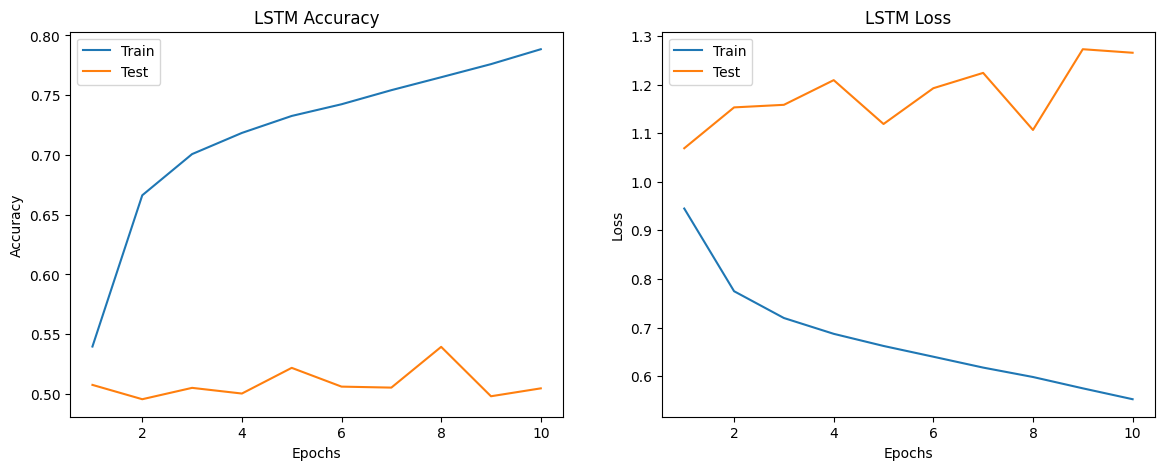

152/152 [==============================] - 3s 17ms/step


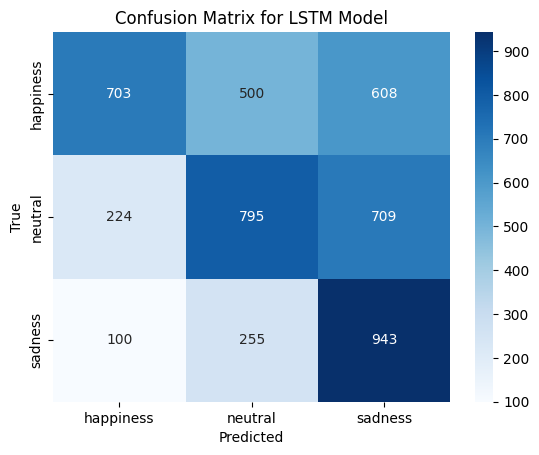

In [15]:
# Plotting for LSTM model
epochs_range = range(1, 11)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_lstm_v2.history['accuracy'], label='Train')
plt.plot(epochs_range, history_lstm_v2.history['val_accuracy'], label='Test')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_lstm_v2.history['loss'], label='Train')
plt.plot(epochs_range, history_lstm_v2.history['val_loss'], label='Test')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions and Confusion Matrix for LSTM
y_pred = model_lstm_v2.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

**And also plotting the Vanilla RNN model with the best results so far (was at the first try):**

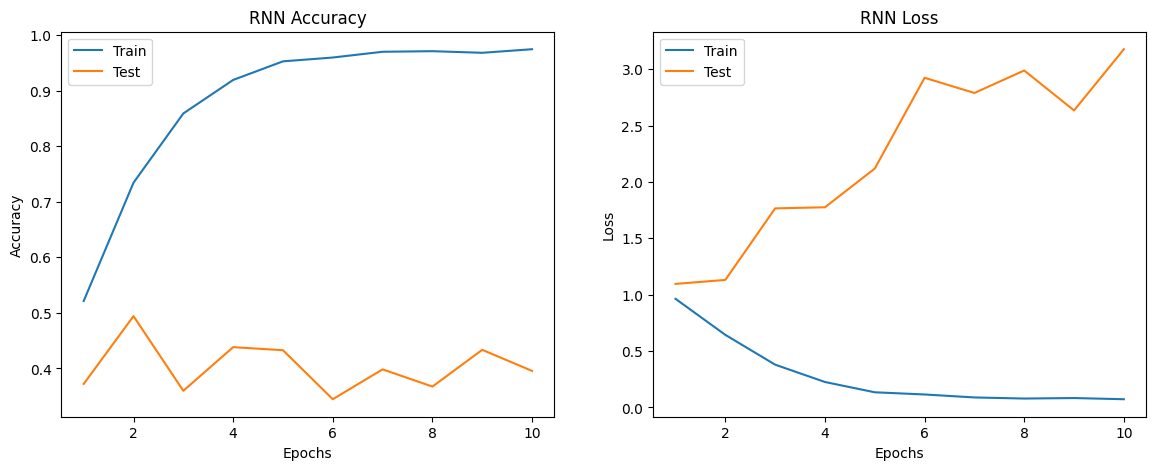

152/152 [==============================] - 3s 15ms/step


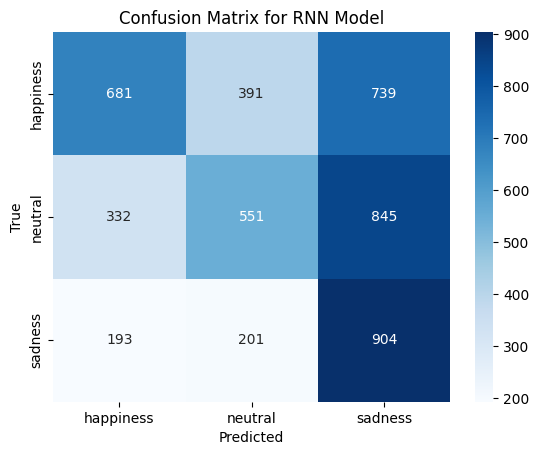

In [20]:
# Plotting for RNN model
epochs_range = range(1, 11)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_rnn1.history['accuracy'], label='Train')
plt.plot(epochs_range, history_rnn1.history['val_accuracy'], label='Test')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_rnn1.history['loss'], label='Train')
plt.plot(epochs_range, history_rnn1.history['val_loss'], label='Test')
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions and Confusion Matrix for RNN
y_pred = model_rnn1.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RNN Model')
plt.show()

### c) Discussion (10 pt)
<p style="font-size: 17px">
Discuss the differences in the methods you have tried.
</p>

We can see that there are observed differences between the Vanilla RNN and LSTM models.<br>
Vanilla RNNs have a straightforward architecture that processes inputs sequentially.
LSTMs are a more complex variant of RNNs designed. <br>
We will discuss the differences between the methods we have tried: <br>
First, we tried to use adam optimizer, with parameters: input_dim=5000, output_dim=64, input_length=100 and epochs=10, validation_split=0.1
<br>

Second, we tried adam optimizer and changed the hyper parameters to be output_dim=32 and number of epochs = 20 (as explained above). <br>
Then, we tried SGD optimizer for both models and dropout for regularization on both models (with the first definition for parameters).

Lastly, we tried RMSprop optimizer for the LSTM in order to improve the result we got with SGD.<br>

We can infer that the use of dropout helped with preventing overfitting, which seems to be a problem indicated by the increasing validation loss and decreasing validation accuracy as training progresses. The dropout randomly sets input units to 0 at each step during training time, helping to prevent overfitting by providing a form of regularization.

Regarding the RMSprop optimizer, RMSprop is an adaptive learning rate optimization algorithm designed to address some of the issues encountered with the traditional stochastic gradient descent (SGD) method.

To conclude, The best results for the LSTM model were while using RMSprop optimizer and output_dim=64, number of epochs = 10. <br>
The best results for the Vanilla RNN model were while using Adam optimizer and output_dim=64, number of epochs = 10.